# **CUSTOMER SEGMANTATION ANALYSIS**

**DATA PREPROCESSING**

In [1]:
# pip install yellowbrick

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_= pd.read_csv('/content/sample_data/marketing_campaign.csv', sep='\t',encoding='utf-8')
df = df_.copy()

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [7]:
# Categorical Variables:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

#  Numerical Variables:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

# **Eksik Veri (Missing Value) Analizi **




In [8]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


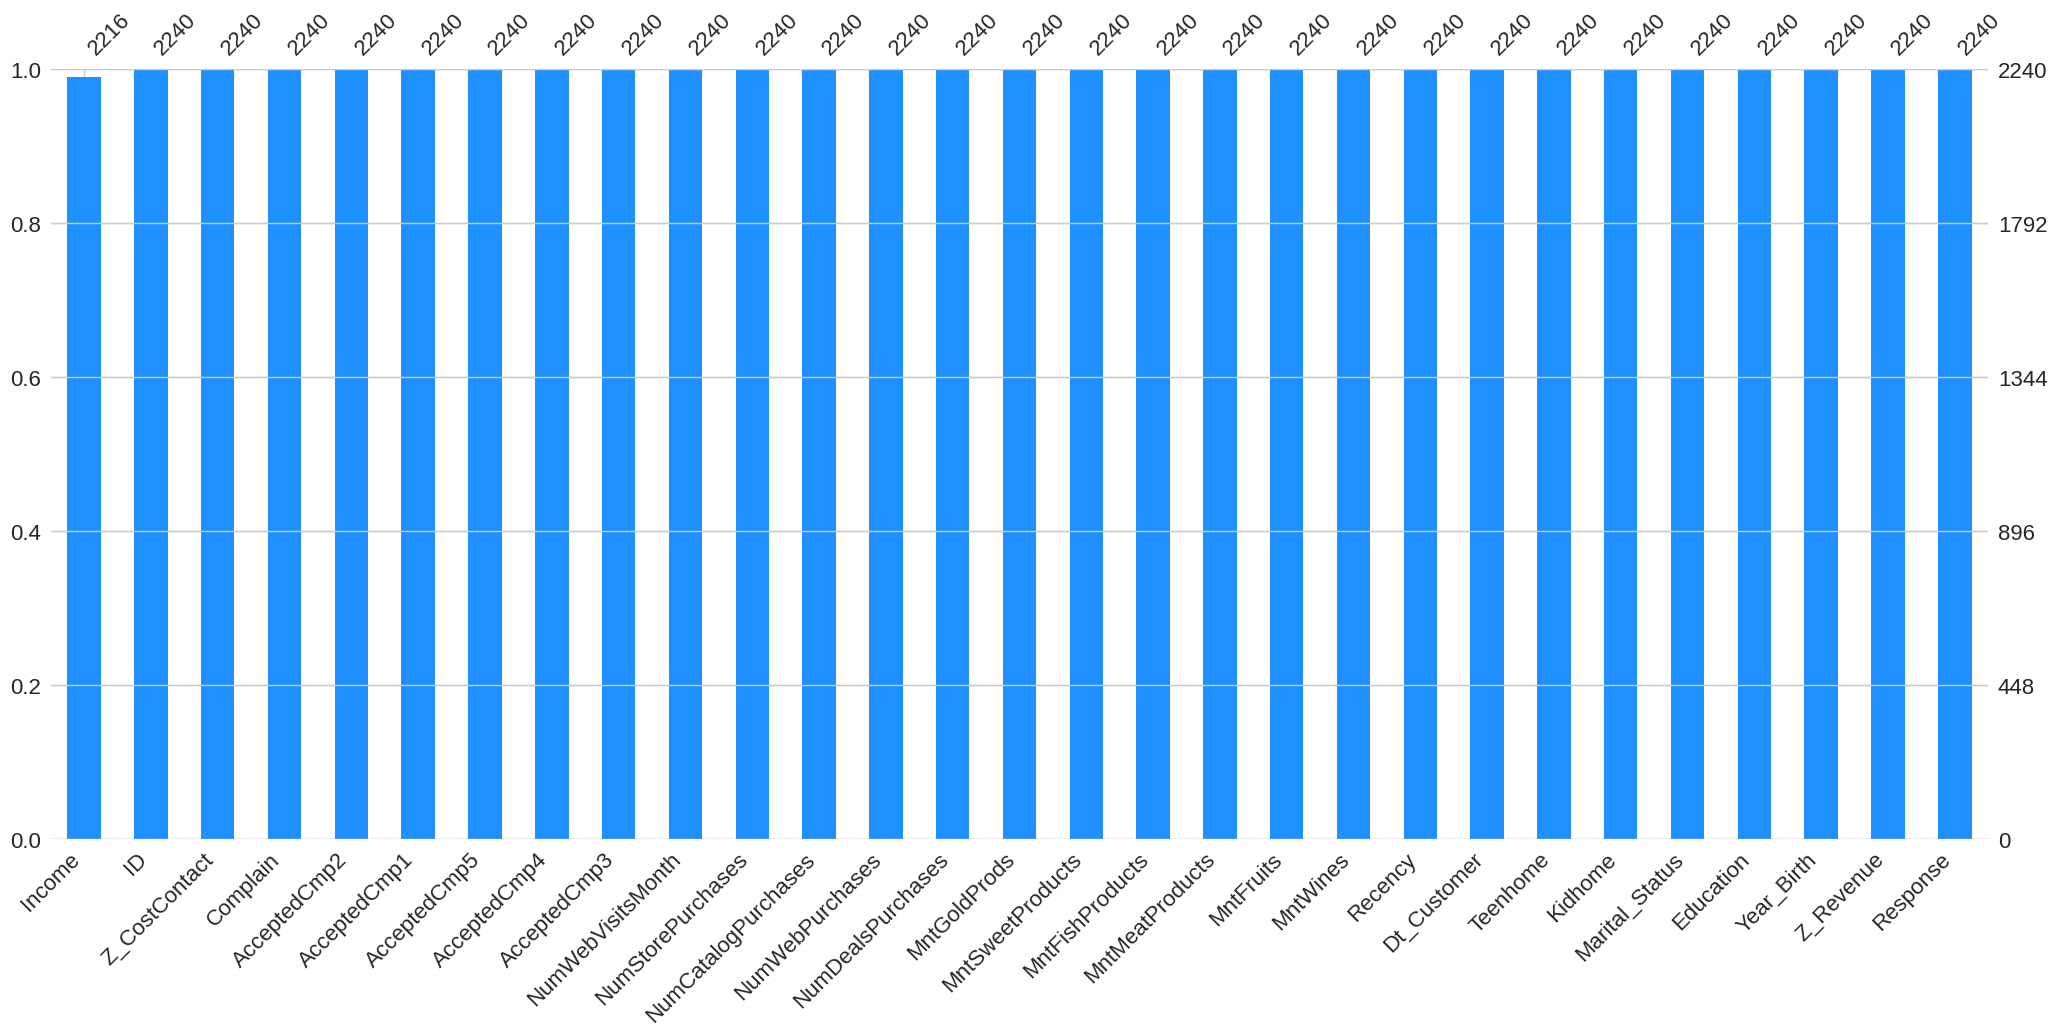

In [9]:
import missingno as msno
msno.bar(df,color="dodgerblue", sort="ascending");

Text(0.5, 1.0, 'Distrbution of income')

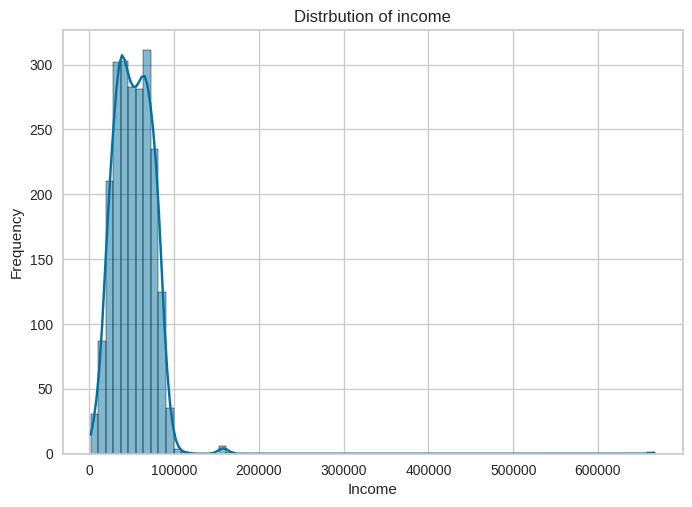

In [10]:

sns.histplot(df.Income,bins=75,kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distrbution of income')

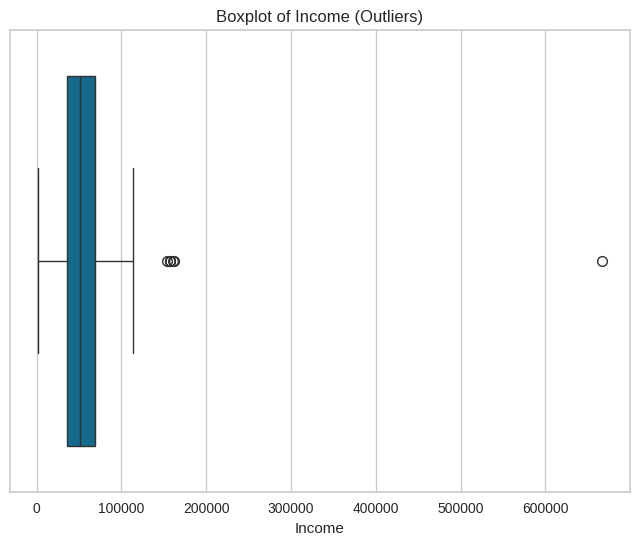

In [11]:
# Boxplot for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.Income)
plt.xlabel('Income')
plt.title('Boxplot of Income (Outliers)')
plt.show()

Sadece Income(Gelir) değişkeninde 24 adet boş değer gözlemlenmiştir. Bu sütunlardaki veriyi kaybetmemek adına outlier 'lara karşı robust olan medyan değeri ile doldurmayı tercih edeceğiz.Dağılım grafikten de sağa çarpık görünüyor.




In [12]:
df["Income"]=df["Income"].fillna(df["Income"].median())

In [13]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# ÖZNİTELİK AÇIKLAMALARI :

ID: Müşteri no

Year_Birth : Doğum Yılı

Education : Eğitim Seviyesi

Marital_Status : Medeni Durum

Income : Müşterinin Yıllık Geliri

Kidhome : Evdeki Çocuk Sayısı (0,1 ve 2 sınıflarından oluşuyor)

Teenhome : Evdeki Genç Sayısı (0,1 ve 2 sınıflarından oluşuyor)

Dt_Customer: Müşterinin Şirkete Kayıt Tarihi

Recency : Son satın alım tarihinden bu yana geçen gün sayısı

Complain : Son 2 yılda müşterinin şikayette bulunup(1) / bulunmadığı (0)

MntWines : Son 2 yılda şaraba harcanan miktar

MntFruits: Son 2 yılda meyvelere harcanan miktar

MntMeatProducts: Son 2 yılda ete harcanan miktar

MntFishProducts: Son 2 yılda balığa harcanan miktar

MntSweetProducts: Son 2 yılda tatlılara harcanan miktar

MntGoldProds:Son 2 yılda yüksek değerli ürünlere harcanan miktar

NumDealsPurchases: İndirimli yapılan alışveriş sayısı

AcceptedCmp1: müşteri 1. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

AcceptedCmp2: müşteri 2. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

AcceptedCmp3: müşteri 3. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

AcceptedCmp4: müşteri 4. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

AcceptedCmp5: müşteri 5. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

Response: müşteri son kampanyada teklifi kabul ettiyse 1, aksi takdirde 0

NumWebPurchases: Şirketin web sitesi üzerinden yapılan satın alma sayısı

NumCatalogPurchases: Katalog kullanılarak yapılan satın alma sayısı

NumStorePurchases: Mağazalarda doğrudan yapılan satın alma sayısı

NumWebVisitsMonth: Şirketin web sitesine son 1 ayda yapılan ziyaret sayısı

Z_CostContact:

Z_Revenue :









In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


# **DATA PREPROCESSING,EDA AND FEATURE ENGINEERING**

In [17]:
# Kayıt Süresini Hesaplama -- Tenure müşterinin yaşı hesabı

from datetime import datetime

# Kayıt tarihini datetime formatına dönüştürme
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y', errors='coerce')

# Kayıt süresini hesaplama (gün cinsinden)
df['Dt_Customer_days'] = (datetime.now() - df['Dt_Customer']).dt.days

df.drop("Dt_Customer",axis=1,inplace=True)

df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_days
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4517
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3967
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,4166
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3993
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4015


In [18]:
df["Z_CostContact"].value_counts()

,count
Z_CostContact,
3,2240


In [19]:
df["Z_Revenue"].value_counts()

,count
Z_Revenue,
11,2240


Bu 3 kardinalitesi yüksek olan değişkenleri veriden siliyoruz. Çünkü modele katkıları yoktur.

In [20]:
df = df.drop(["Z_CostContact", "Z_Revenue","ID"], axis=1)

In [21]:
df['Age']=2024-df['Year_Birth']
df['Age'].describe()

,Age
count,2240.000000
mean,55.194196
std,11.984069
min,28.000000
25%,47.000000
50%,54.000000
75%,65.000000
max,131.000000


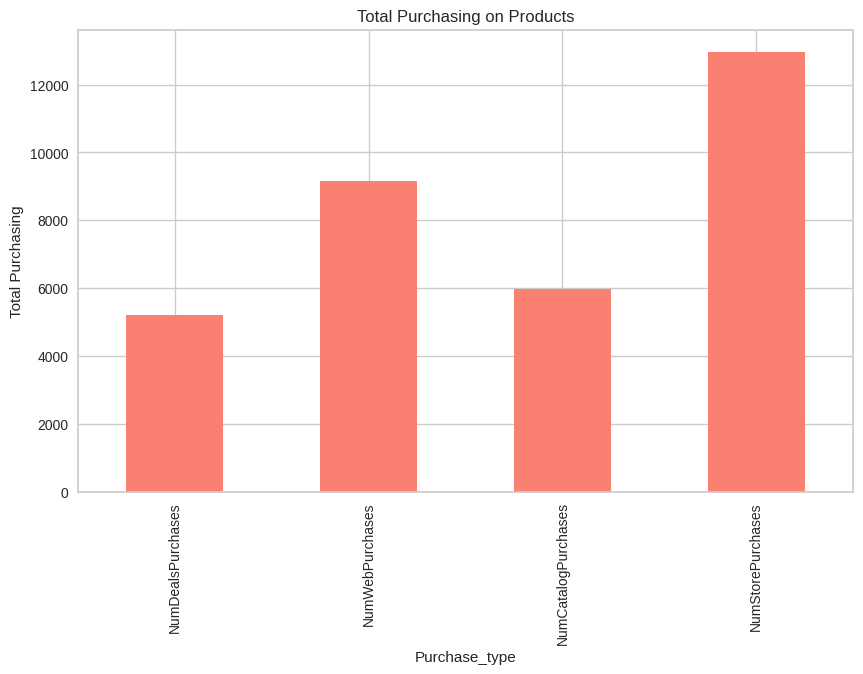

In [22]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
total_purchase = df[purchase_type].sum()
plt.figure(figsize=(10,6))
total_purchase.plot(kind='bar', color='salmon')
plt.title('Total Purchasing on Products')
plt.xlabel('Purchase_type')
plt.ylabel('Total Purchasing')
plt.show()

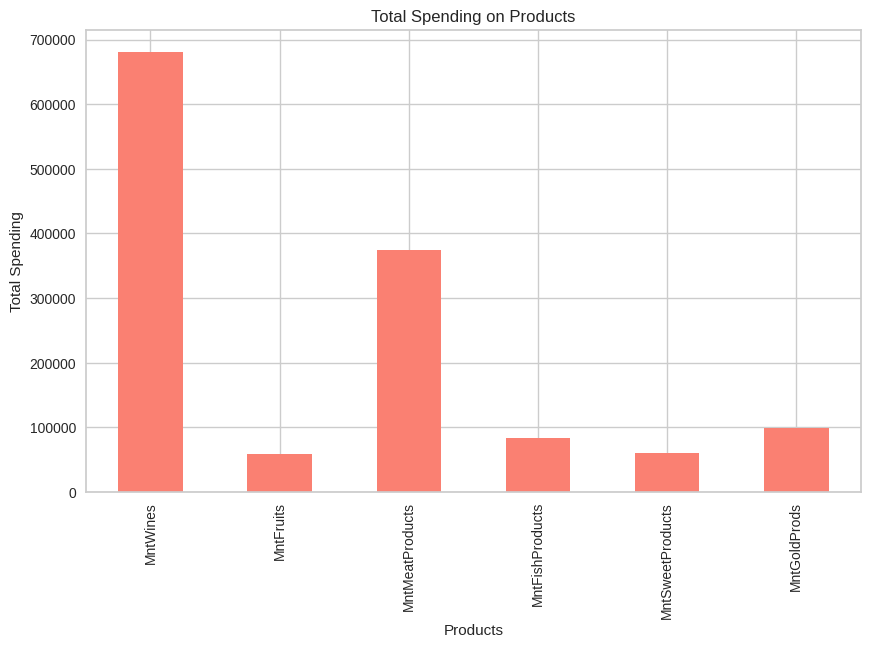

In [23]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[products].sum()
plt.figure(figsize=(10,6))
total_spent.plot(kind='bar', color='salmon')
plt.title('Total Spending on Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

In [24]:
df['Total_Spending'] = df[products].sum(axis=1)

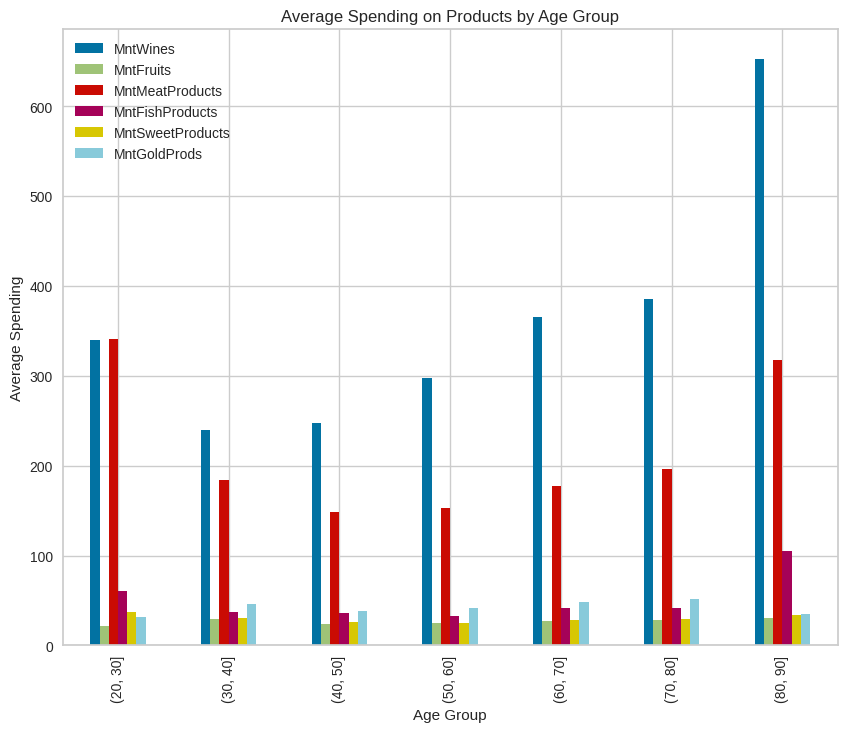

In [25]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

spending_by_age = df.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(10,8))
plt.title('Average Spending on Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

In [26]:
df=df.drop(["Year_Birth","Age"],axis=1)

In [27]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Basic'})
df.Education.value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
Basic,257


In [28]:
df['AcceptedCmp'] = (
    df['AcceptedCmp1'] +
    df['AcceptedCmp2'] +
    df['AcceptedCmp3'] +
    df['AcceptedCmp4'] +
    df['AcceptedCmp5']
)

df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

In [29]:
df['AcceptedCmp'].value_counts()

,count
AcceptedCmp,
0,1777
1,325
2,83
3,44
4,11


Müşterinin büyük bir çoğunluğu kampanyaya karşı duyarlı olmadığını görmekteyiz.

In [30]:
 # Satın alma adetleri değişkeni elde etme

df['SumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [31]:
df=df.drop(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"],axis=1)

In [32]:
df["ChildrenHome"]=df["Kidhome"]+df["Teenhome"]

In [33]:
df["ChildrenHome"].value_counts()

,count
ChildrenHome,
1,1128
0,638
2,421
3,53


Müşterilerin çoğunluğunun tek çocuklu olduğunu görmekteyiz.

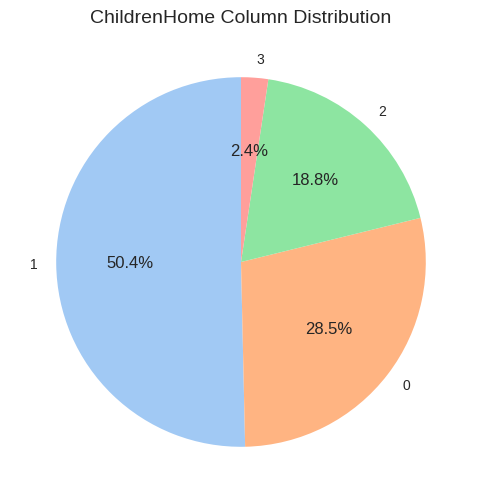

In [34]:
# Value counts ve renkler
value_counts = df["ChildrenHome"].value_counts()
colors = sns.color_palette("pastel", len(value_counts))

# Pasta grafiği çizimi
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("ChildrenHome Column Distribution", fontsize=14)
plt.show()

In [35]:
df=df.drop(["Kidhome","Teenhome"],axis=1)

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Dt_Customer_days', 'Total_Spending', 'Age_Group', 'AcceptedCmp',
       'SumPurchases', 'ChildrenHome'],
      dtype='object')

In [36]:
df.dtypes

,0
Education,object
Marital_Status,object
Income,float64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


In [37]:
# Categorical & Numerical Variables:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    #num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col]

    #num_cols = [col for col in num_cols if col not in num_but_cat and dataframe[col].dtype.name != 'category']

    num_cols = [col for col in dataframe.columns
                if dataframe[col].dtype != 'O' and
                dataframe[col].dtype.name != 'category' and  # kategorik sütunları hariç tut
                "ID" not in col]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


# Categorical Variables:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        plt.figure(figsize=(6,4))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

#  Numerical Variables:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        plt.figure(figsize=(6, 4))
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

In [38]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(cat_cols)
print(num_cols)

Observations: 2240
Variables: 19
cat_cols: 7
num_cols: 16
cat_but_car: 0
num_but_cat: 5
['Education', 'Marital_Status', 'Complain', 'Response', 'Age_Group', 'AcceptedCmp', 'ChildrenHome']
['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'Response', 'Dt_Customer_days', 'Total_Spending', 'AcceptedCmp', 'SumPurchases', 'ChildrenHome']


            Education      Ratio
Education                       
Graduation       1127  50.312500
PhD               486  21.696429
Master            370  16.517857
Basic             257  11.473214
##########################################


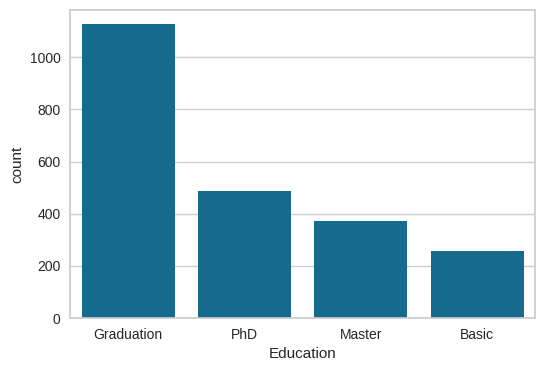

                Marital_Status      Ratio
Marital_Status                           
Married                    864  38.571429
Together                   580  25.892857
Single                     480  21.428571
Divorced                   232  10.357143
Widow                       77   3.437500
Alone                        3   0.133929
Absurd                       2   0.089286
YOLO                         2   0.089286
##########################################


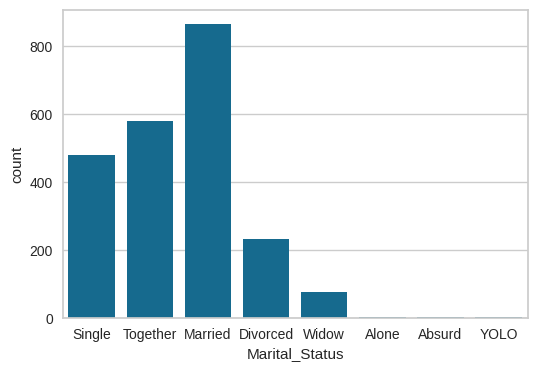

          Complain    Ratio
Complain                   
0             2219  99.0625
1               21   0.9375
##########################################


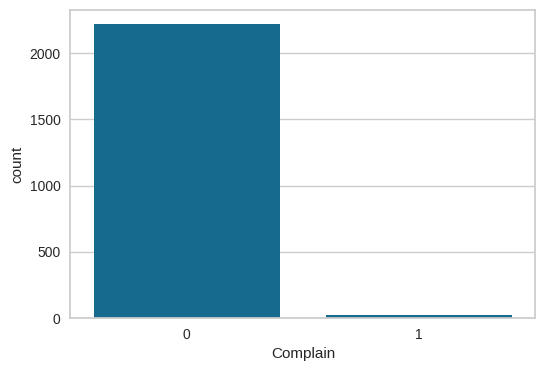

          Response      Ratio
Response                     
0             1906  85.089286
1              334  14.910714
##########################################


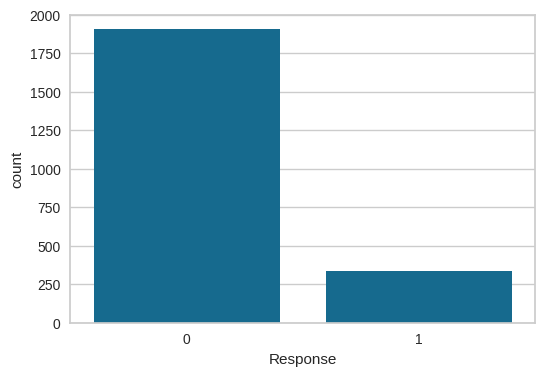

           Age_Group      Ratio
Age_Group                      
(50, 60]         649  28.973214
(40, 50]         588  26.250000
(60, 70]         475  21.205357
(70, 80]         257  11.473214
(30, 40]         249  11.116071
(20, 30]          10   0.446429
(80, 90]           9   0.401786
##########################################


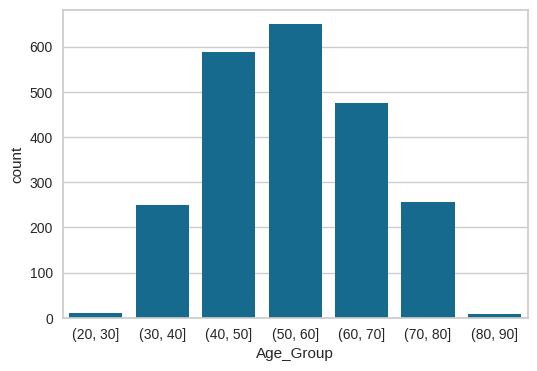

             AcceptedCmp      Ratio
AcceptedCmp                        
0                   1777  79.330357
1                    325  14.508929
2                     83   3.705357
3                     44   1.964286
4                     11   0.491071
##########################################


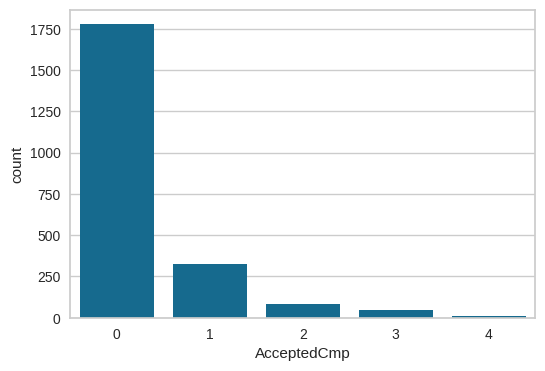

              ChildrenHome      Ratio
ChildrenHome                         
1                     1128  50.357143
0                      638  28.482143
2                      421  18.794643
3                       53   2.366071
##########################################


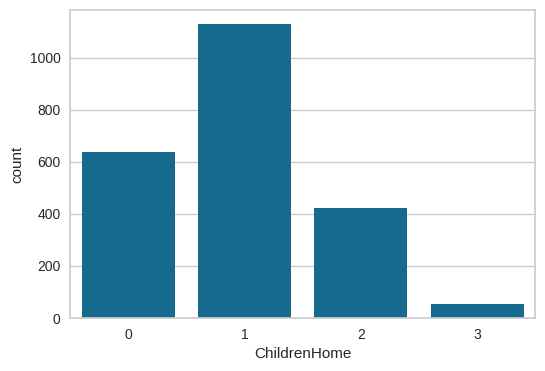

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
5%        19101.050000
10%       24219.500000
20%       32230.000000
30%       38361.000000
40%       44944.200000
50%       51381.500000
60%       58169.600000
70%       65104.600000
80%       71634.800000
90%       79800.300000
95%       83927.000000
99%       94437.680000
max      666666.000000
Name: Income, dtype: float64


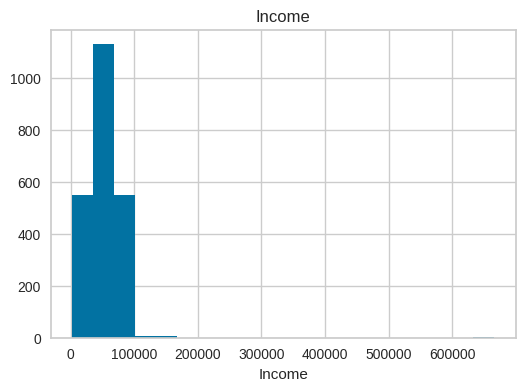

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
5%          4.000000
10%         9.000000
20%        19.000000
30%        29.000000
40%        39.000000
50%        49.000000
60%        59.000000
70%        69.000000
80%        79.000000
90%        89.000000
95%        94.000000
99%        98.000000
max        99.000000
Name: Recency, dtype: float64


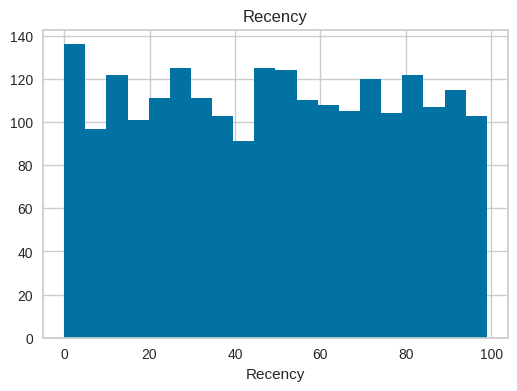

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
5%          3.000000
10%         6.000000
20%        16.000000
30%        34.000000
40%        81.000000
50%       173.500000
60%       284.400000
70%       418.600000
80%       581.200000
90%       822.100000
95%      1000.000000
99%      1285.000000
max      1493.000000
Name: MntWines, dtype: float64


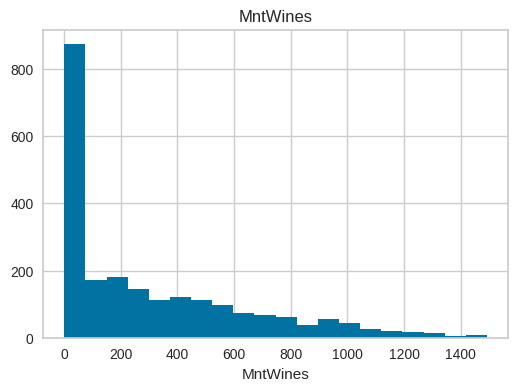

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         4.000000
50%         8.000000
60%        15.000000
70%        25.000000
80%        44.000000
90%        83.000000
95%       123.000000
99%       172.000000
max       199.000000
Name: MntFruits, dtype: float64


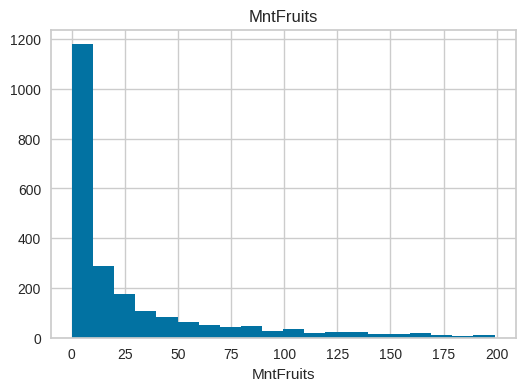

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
5%          4.000000
10%         7.000000
20%        12.000000
30%        20.000000
40%        35.000000
50%        67.000000
60%       108.400000
70%       177.000000
80%       298.400000
90%       499.000000
95%       687.100000
99%       915.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


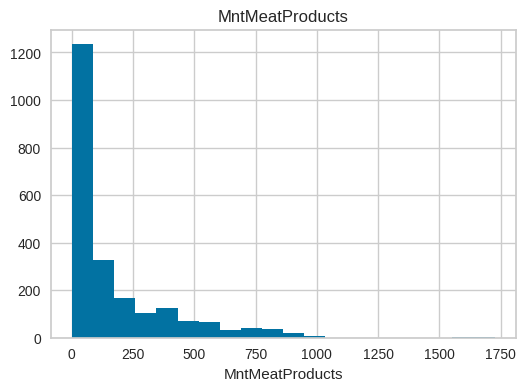

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
5%          0.000000
10%         0.000000
20%         2.000000
30%         3.000000
40%         7.000000
50%        12.000000
60%        20.000000
70%        37.000000
80%        65.000000
90%       120.000000
95%       168.050000
99%       226.220000
max       259.000000
Name: MntFishProducts, dtype: float64


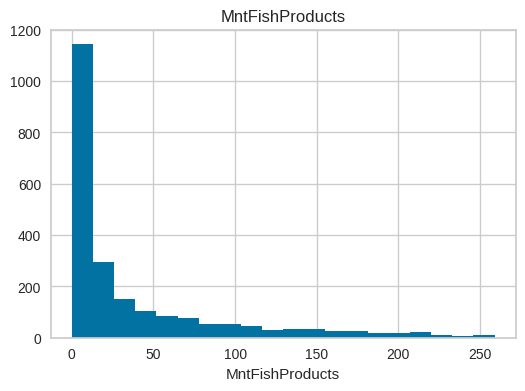

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         5.000000
50%         8.000000
60%        14.000000
70%        26.000000
80%        44.200000
90%        89.000000
95%       126.000000
99%       177.220000
max       263.000000
Name: MntSweetProducts, dtype: float64


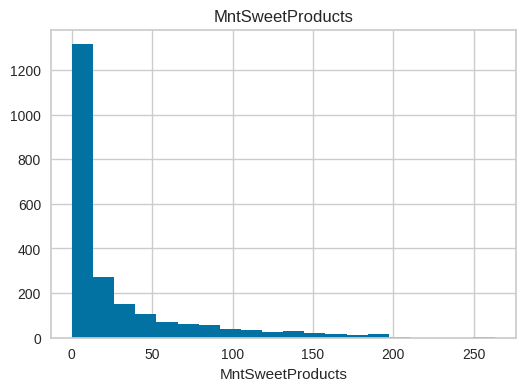

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
5%          1.000000
10%         3.000000
20%         6.000000
30%        11.000000
40%        17.000000
50%        24.000000
60%        34.000000
70%        46.000000
80%        73.000000
90%       122.000000
95%       165.050000
99%       227.000000
max       362.000000
Name: MntGoldProds, dtype: float64


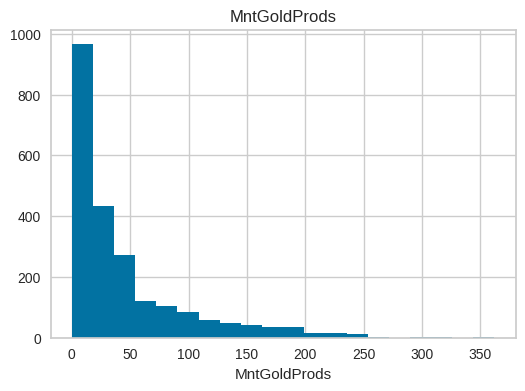

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
5%          1.000000
10%         2.000000
20%         3.000000
30%         4.000000
40%         5.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%         9.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


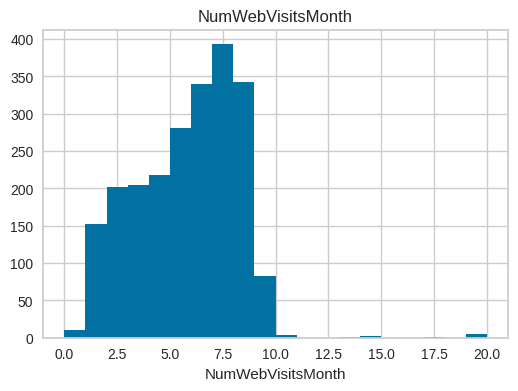

count    2240.000000
mean        0.009375
std         0.096391
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Complain, dtype: float64


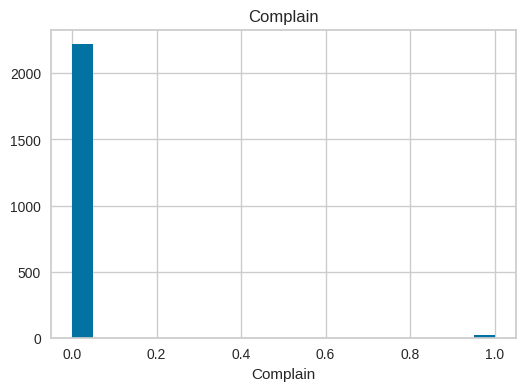

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: Response, dtype: float64


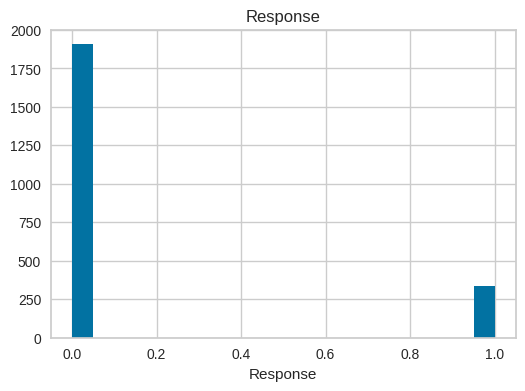

count    2240.000000
mean     4207.582143
std       202.122512
min      3854.000000
5%       3892.000000
10%      3925.900000
20%      3996.000000
30%      4073.000000
40%      4138.600000
50%      4209.500000
60%      4277.000000
70%      4349.000000
80%      4418.000000
90%      4489.100000
95%      4521.000000
99%      4545.000000
max      4553.000000
Name: Dt_Customer_days, dtype: float64


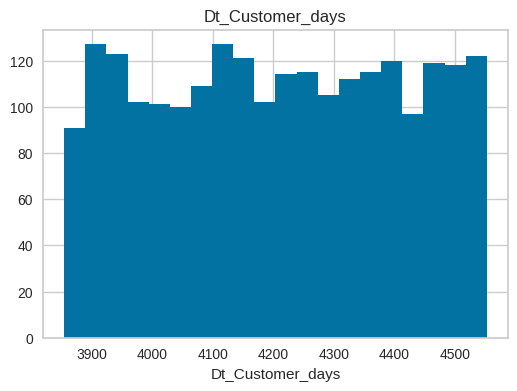

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
5%         22.000000
10%        34.900000
20%        55.000000
30%        91.000000
40%       194.600000
50%       396.000000
60%       635.400000
70%       926.000000
80%      1174.000000
90%      1536.200000
95%      1772.300000
99%      2126.000000
max      2525.000000
Name: Total_Spending, dtype: float64


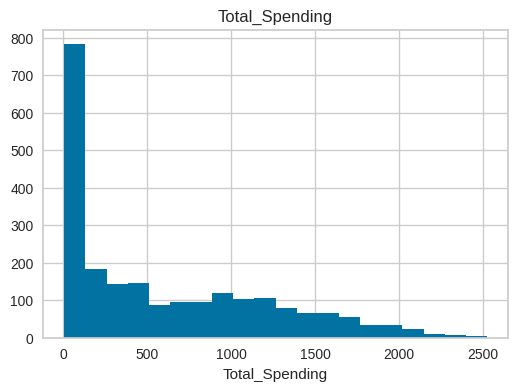

count    2240.000000
mean        0.297768
std         0.678381
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         1.000000
90%         1.000000
95%         2.000000
99%         3.000000
max         4.000000
Name: AcceptedCmp, dtype: float64


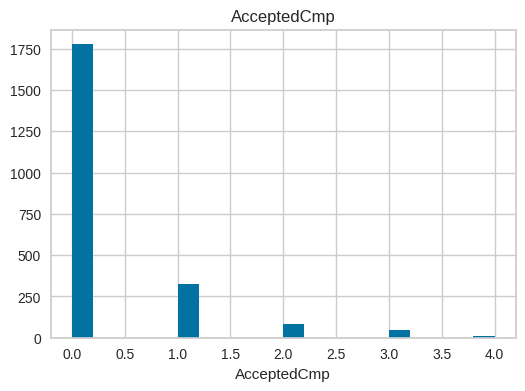

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
5%          4.000000
10%         5.000000
20%         7.000000
30%         9.000000
40%        11.000000
50%        15.000000
60%        17.000000
70%        20.000000
80%        22.000000
90%        25.000000
95%        27.000000
99%        32.000000
max        44.000000
Name: SumPurchases, dtype: float64


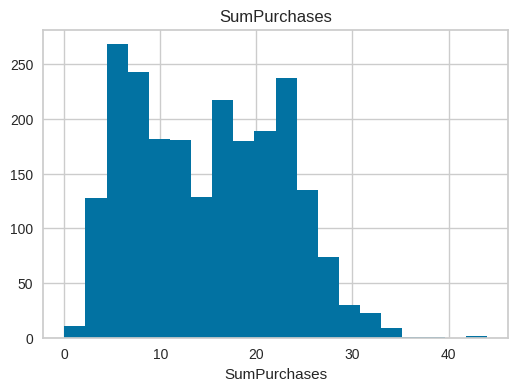

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         2.000000
90%         2.000000
95%         2.000000
99%         3.000000
max         3.000000
Name: ChildrenHome, dtype: float64


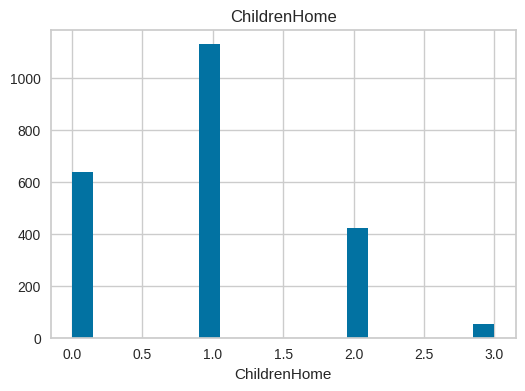

In [39]:
for col in cat_cols:
    cat_summary(df, col, plot=True)
for col in num_cols:
    num_summary(df, col, plot=True)

In [40]:
df["Complain"].value_counts()

,count
Complain,
0,2219
1,21


# AYKIRI DEĞER ANALİZİ(OUTLIER)

# IQR (Interquartile Range) Yöntemi

IQR Yöntemi (Interquartile Range)
Nasıl Çalışır?
IQR yöntemi, verinin 1. çeyreği (Q1) ve 3. çeyreği (Q3) arasındaki farkı hesaplar ve uç değerleri bu aralığın dışında kalan değerler olarak tanımlar. Genellikle:

Lower Bound: Q1 - 1.5 * IQR
Upper Bound: Q3 + 1.5 * IQR
Bu sınırların dışındaki değerler outlier olarak kabul edilir ve kaldırılır veya işlenir.

Avantajı:

İstatistiksel olarak sağlamdır, çünkü medyan ve çeyrek değerler outlier'lara karşı dayanıklıdır.
Uygulaması basittir ve sık kullanılır.

Ne Zaman Kullanılır?

Outlier'ların kaldırılmasının veya daha belirgin bir şekilde işlenmesinin gerektiği durumlarda.
Verinin daha temiz bir şekilde analiz edilmesi gerektiğinde.

In [41]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit




def check_outlier(dataframe, col_name):
    import pandas as pd

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        # Check for any outliers
        outlier_condition = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
        if outlier_condition.any():
            return True
        else:
            return False
    else:
        return False


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [42]:
# Fonksiyonları uygulamak için bir loop
excluded_columns = ['Response', 'Complain', 'AcceptedCmp']

for column in df.columns:
    # Sütunun excluded listesinde olmadığını ve sayısal bir kolon olduğunu kontrol ediyoruz
    if column not in excluded_columns and pd.api.types.is_numeric_dtype(df[column]):
        # Eğer outlier varsa
        if check_outlier(df, column):
            print(f"Outlier bulundu ve işleniyor: {column}")
            replace_with_thresholds(df, column)
        else:
            print(f"Outlier bulunmadı: {column}")


Outlier bulundu ve işleniyor: Income
Outlier bulunmadı: Recency
Outlier bulundu ve işleniyor: MntWines
Outlier bulundu ve işleniyor: MntFruits
Outlier bulundu ve işleniyor: MntMeatProducts
Outlier bulundu ve işleniyor: MntFishProducts
Outlier bulundu ve işleniyor: MntSweetProducts
Outlier bulundu ve işleniyor: MntGoldProds
Outlier bulundu ve işleniyor: NumWebVisitsMonth
Outlier bulunmadı: Dt_Customer_days
Outlier bulundu ve işleniyor: Total_Spending
Outlier bulundu ve işleniyor: SumPurchases
Outlier bulundu ve işleniyor: ChildrenHome


excluded_columns = ['Response', 'Complain', 'AcceptedCmp'] bu değişkenleri aykırı değer analizine dahil etmememizin sebebi bu 3 kolona ait imbalance sınıf sayısı olup baskılandığında kolonda sadece tek bir sınıf kalmaktadır.

In [43]:
for col in num_cols:
    print(col, check_outlier(df, col))

Income False
Recency False
MntWines False
MntFruits False
MntMeatProducts False
MntFishProducts False
MntSweetProducts False
MntGoldProds False
NumWebVisitsMonth False
Complain True
Response True
Dt_Customer_days False
Total_Spending False
AcceptedCmp True
SumPurchases False
ChildrenHome False


11 kolonda outlier olan değerler gözlemledik ve bunları up ve low limitlere baskıladık.

In [44]:
for col in num_cols:
    if col not in excluded_columns:
        if check_outlier(df, col):
            print(f"Outlier bulundu ve işleniyor: {col}")
            replace_with_thresholds(df, col)
        else:
            print(f"Outlier bulunmadı: {col}")

Outlier bulunmadı: Income
Outlier bulunmadı: Recency
Outlier bulunmadı: MntWines
Outlier bulunmadı: MntFruits
Outlier bulunmadı: MntMeatProducts
Outlier bulunmadı: MntFishProducts
Outlier bulunmadı: MntSweetProducts
Outlier bulunmadı: MntGoldProds
Outlier bulunmadı: NumWebVisitsMonth
Outlier bulunmadı: Dt_Customer_days
Outlier bulunmadı: Total_Spending
Outlier bulunmadı: SumPurchases
Outlier bulunmadı: ChildrenHome


In [45]:
# Let's check outliers again:

for col in num_cols:
    print(col, check_outlier(df, col))

Income False
Recency False
MntWines False
MntFruits False
MntMeatProducts False
MntFishProducts False
MntSweetProducts False
MntGoldProds False
NumWebVisitsMonth False
Complain True
Response True
Dt_Customer_days False
Total_Spending False
AcceptedCmp True
SumPurchases False
ChildrenHome False


In [46]:
df.AcceptedCmp.value_counts()

,count
AcceptedCmp,
0,1777
1,325
2,83
3,44
4,11


In [47]:
df.ChildrenHome.value_counts()

,count
ChildrenHome,
1.0,1128
0.0,638
2.0,421
2.5,53


In [48]:
df.Response.value_counts()

,count
Response,
0,1906
1,334


Aykırı değerleri tespit aşamasında box plot ,scatter plot ya da Z score gibi yöntemleri de uygulayabilirdik.

Aykırı değer analizinde outlier değerleri alt ve üst sınır değerlerine **IQR** ile baskılamayı tercih ettik ancak outlier ları ayrı bir küme yaparak ya da Outlier'ları temizlemeden veya değiştirmeden, onlara duyarlı olmayan algoritmalarla çalışarak ya da **Capleme** yöntemi olan belirli bir eşiğe çekme yöntemi olan **Winsorize** ile de analizimize devam edebilirdik.

Tree-based modeller: Karar ağaçları ve rastgele ormanlar (**Random Forest**) outlier'lara karşı daha az duyarlıdır.
Robust Regression: HuberRegressor veya RANSAC gibi algoritmalar, outlier'ların etkisini azaltır.

In [ ]:
# df.to_csv('./rapiddata.csv', index=False)


# **HEATMAP- DEĞİŞKENLER ARASI İLİŞKİ MATRİSİ**

In [49]:
df[['Response', 'Complain','AcceptedCmp']] = df[['Response', 'Complain','AcceptedCmp']].astype('category')


In [50]:
from matplotlib.colors import LinearSegmentedColormap

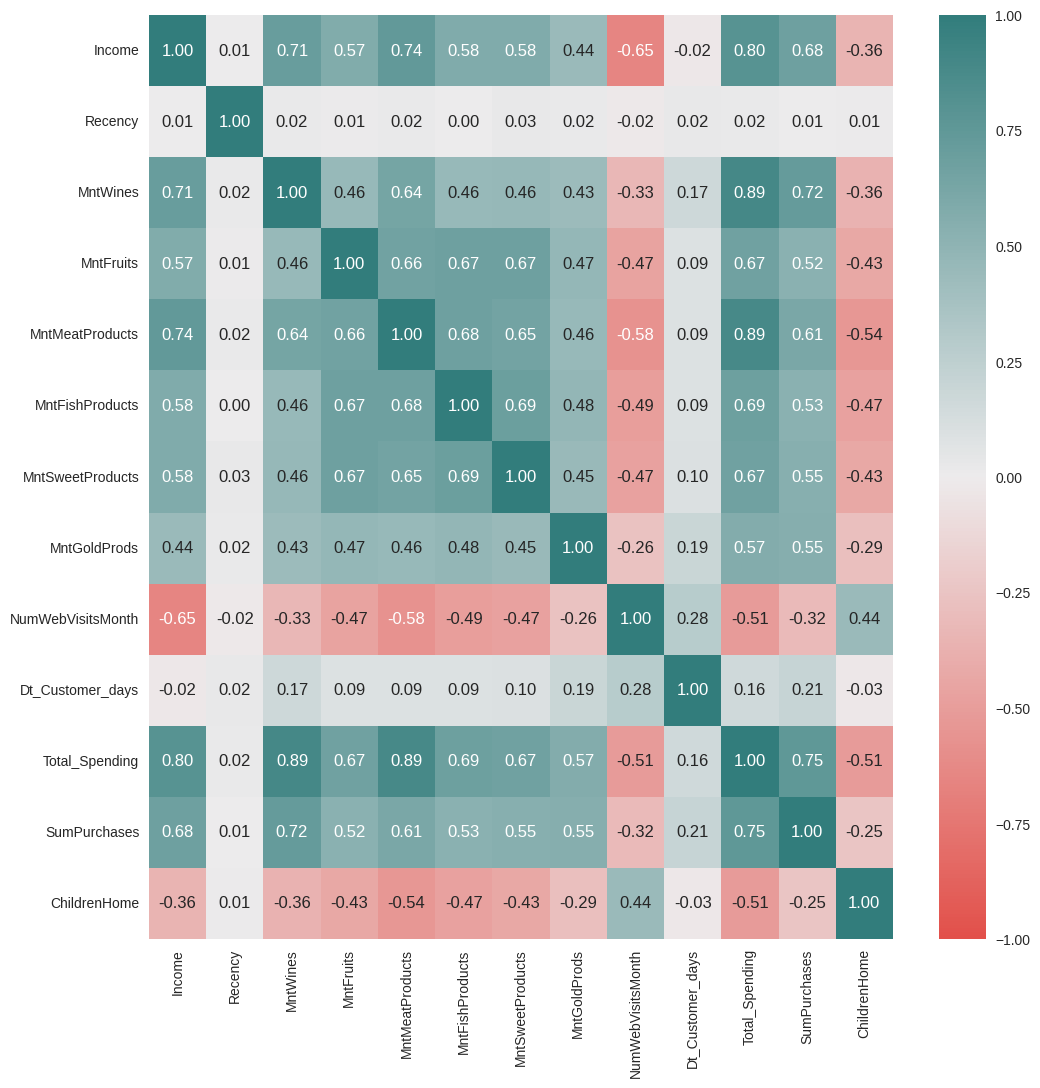

In [51]:
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True,fmt=".2f")
plt.show()

Total_Spending ve Income arasında pozitif yönlü %80 oranında korelasyon olduğunu söyleyebiliriz.

SumPurchases ile MntWines öznitelikleri arasında %72 pozitif bir ilişki olduğunu söyleyebiliriz.

MntMeatProducts ile Income öznitelikleri arasında %74 pozitif bir ilişki olduğunu söyleyebiliriz.

MntWines ile Income öznitelikleri arasında %71 pozitif bir ilişki olduğunu söyleyebiliriz.

Gelirin artması ile Wine ve Meat satın alımlarının artması beklenen bir durumdur.

# ***LOG Dönüşümü (Normalizasyon) ve Standardizasyon***

Log dönüşümü yalnızca pozitif numerik değerlerde uygulanabilir. Eğer veri setinizde sıfır veya negatif değerler varsa, bu değerlere dönüşüm yapamazsınız.
Outlier'ları ele alırken, sıfır veya negatif değerleri pozitif hale getirmek için (örneğin, bir sabit ekleyerek) düzenleme yapılabilir.

Neden Önce Standardizasyon ve Dönüşüm Yapılır?

Tutarlılık Sağlama:

Eğer veriyi cross-validation sırasında farklı parçalar halinde normalize ederseniz, her parçanın kendi ortalaması ve standart sapması üzerinden dönüşüm yapılır. Bu, ölçeklerin tutarlılığını bozar.
Model, farklı ölçeklerdeki verilerle eğitilmiş olur ve performans yanıltıcı hale gelir.

Doğru Ölçek:

Özellikle K-means gibi mesafe tabanlı algoritmalarda tüm özelliklerin aynı ölçekte olması çok önemlidir. Bu, algoritmanın özellikler arasında adil bir şekilde mesafe hesaplamasını sağlar.

Bilgi Kaçağı (Data Leakage):

Eğer dönüşüm cross-validation sırasında yapılırsa, test setindeki bilgilerin bir kısmı eğitim setine sızabilir (örn. test setinin ortalama ve standart sapması eğitim setini etkiler). Bu da gerçek dünya senaryolarında modelin performansını yansıtmaz.

***Transformation***

In [52]:
df_standardized = df[num_cols].copy()
df_standardized

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,Dt_Customer_days,Total_Spending,AcceptedCmp,SumPurchases,ChildrenHome
0,58138.0,58,635,81,546,120.5,81,88.0,7,0,1,4517,1617.0,0,25.0,0.0
1,46344.0,38,11,1,6,2.0,1,6.0,5,0,0,3967,27.0,0,6.0,2.0
2,71613.0,26,426,49,127,111.0,21,42.0,4,0,0,4166,776.0,0,21.0,0.0
3,26646.0,26,11,4,20,10.0,3,5.0,6,0,0,3993,53.0,0,8.0,1.0
4,58293.0,94,173,43,118,46.0,27,15.0,5,0,0,4015,422.0,0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42.0,81,126.5,5,0,0,4235,1341.0,0,18.0,1.0
2236,64014.0,56,406,0,30,0.0,0,8.0,7,0,0,3873,444.0,1,22.0,2.5
2237,56981.0,91,908,48,217,32.0,12,24.0,6,0,0,4009,1241.0,1,19.0,0.0
2238,69245.0,8,428,30,214,80.0,30,61.0,3,0,0,4010,843.0,0,23.0,1.0


In [53]:
for column in df_standardized.select_dtypes(include=['category']).columns:
    df_standardized[column] = df_standardized[column].cat.codes

In [54]:
df_standardized = np.log1p(df_standardized)

df_standardized.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,Dt_Customer_days,Total_Spending,AcceptedCmp,SumPurchases,ChildrenHome
0,10.970592,4.077537,6.455199,4.406719,6.304449,4.799914,4.406719,4.488636,2.079442,0.0,0.693359,8.415825,7.388946,0.0,3.258097,0.000000
1,10.743869,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.791759,0.0,0.000000,8.286017,3.332205,0.0,1.945910,1.098612
2,11.179046,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,1.609438,0.0,0.000000,8.334952,6.655440,0.0,3.091042,0.000000
3,10.190432,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.945910,0.0,0.000000,8.292549,3.988984,0.0,2.197225,0.693147
4,10.973254,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,0.0,0.000000,8.298042,6.047372,0.0,2.995732,0.693147


In [55]:
df_standardized.Complain.value_counts()

,count
Complain,
0.000000,2219
0.693359,21


***Standardization***

Z Score, Min-Max(normalization),Robust,MaxAbsScaler standartlaştırma yöntemlerinden birini kullanabiliriz. Outlier değerleri bertaraf ettiğimize göre Min-Max Scaler yöntemini kullanabiliriz . Scaling işleminin sadece numeric kolonlar üzerinde yaptığımızı unutmayalım. KNN,K-Means ve DBSCAN gibi mesafe bazlı algoritmalar için de Min-Max scaling yönteminin daha doğru çalıştığını söyleyebiliriz.


In [56]:
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(df_standardized)
df_standardized=pd.DataFrame(model_scaling,columns=df_standardized.columns)
df_standardized.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,Dt_Customer_days,Total_Spending,AcceptedCmp,SumPurchases,ChildrenHome
0,0.833320,0.885426,0.907711,1.000000,0.997135,1.000000,1.000000,0.925852,0.787949,0.0,1.0,0.952372,0.927158,0.0,0.874494,0.000000
1,0.779556,0.795532,0.349420,0.157293,0.307772,0.228882,0.157293,0.401374,0.678939,0.0,0.0,0.173380,0.255170,0.0,0.522295,0.876951
2,0.882751,0.715682,0.851687,0.887740,0.767415,0.983038,0.701438,0.775806,0.609853,0.0,0.0,0.467041,0.805655,0.0,0.829656,0.000000
3,0.648317,0.715682,0.349420,0.365224,0.481533,0.499570,0.314586,0.369578,0.737350,0.0,0.0,0.212574,0.363964,0.0,0.589749,0.553295
4,0.833951,0.988862,0.725451,0.858732,0.755884,0.802128,0.756164,0.571890,0.678939,0.0,0.0,0.245539,0.704930,0.0,0.804074,0.553295


# ***ENCODING İŞLEMLERİ***

Eğer sıralanabilir kategorik veriler (örneğin eğitim seviyesi) varsa, **Label
Encoding** kullanılır.

Sırasız kategorik veriler (örneğin renkler, şehir isimleri) için **One-Hot Encoding** kullanılır.

Education ve Marital_Status dışındaki tüm değiŞkenler Encode edilmiş haldedir.




In [57]:
cat_cols

['Education',
 'Marital_Status',
 'Complain',
 'Response',
 'Age_Group',
 'AcceptedCmp',
 'ChildrenHome']

In [58]:
df.ChildrenHome.value_counts()

,count
ChildrenHome,
1.0,1128
0.0,638
2.0,421
2.5,53


In [59]:
df_encoded = df[cat_cols].copy()

In [60]:
# 1. Education için Label Encoding

# Eğitim seviyeleri için sıralama

education_order = ['Basic', 'Graduation', 'Master', 'PhD']

le = LabelEncoder()
le.fit(education_order)

df_encoded['Education_LabelEncoded'] = le.transform(df_encoded['Education'])

# 2. Marital_Status için One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'], prefix='Marital', drop_first=True)



In [61]:
df_encoded = pd.get_dummies(df_encoded, columns=['ChildrenHome'], prefix='ChildrenHome', drop_first=True)


In [62]:
df_encoded.drop(['Education','Age_Group'],axis=1,inplace=True)

In [63]:
df_new = df_standardized.join(df_encoded,lsuffix='_standardized', rsuffix='_encoded')   # numeric ve kategorik değişken df leri birleştirildi..


In [64]:
df_new.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain_standardized,Response_standardized,Dt_Customer_days,Total_Spending,AcceptedCmp_standardized,SumPurchases,ChildrenHome,Complain_encoded,Response_encoded,AcceptedCmp_encoded,Education_LabelEncoded,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO,ChildrenHome_1.0,ChildrenHome_2.0,ChildrenHome_2.5
0,0.833320,0.885426,0.907711,1.000000,0.997135,1.000000,1.000000,0.925852,0.787949,0.0,1.0,0.952372,0.927158,0.0,0.874494,0.000000,0,1,0,1,False,False,False,True,False,False,False,False,False,False
1,0.779556,0.795532,0.349420,0.157293,0.307772,0.228882,0.157293,0.401374,0.678939,0.0,0.0,0.173380,0.255170,0.0,0.522295,0.876951,0,0,0,1,False,False,False,True,False,False,False,False,True,False
2,0.882751,0.715682,0.851687,0.887740,0.767415,0.983038,0.701438,0.775806,0.609853,0.0,0.0,0.467041,0.805655,0.0,0.829656,0.000000,0,0,0,1,False,False,False,False,True,False,False,False,False,False
3,0.648317,0.715682,0.349420,0.365224,0.481533,0.499570,0.314586,0.369578,0.737350,0.0,0.0,0.212574,0.363964,0.0,0.589749,0.553295,0,0,0,1,False,False,False,False,True,False,False,True,False,False
4,0.833951,0.988862,0.725451,0.858732,0.755884,0.802128,0.756164,0.571890,0.678939,0.0,0.0,0.245539,0.704930,0.0,0.804074,0.553295,0,0,0,3,False,False,True,False,False,False,False,True,False,False


In [65]:
df_new.shape

(2240, 30)

## **Feature Selection/Dimensionality Reduction**- **ÖZELLİK SEÇİMİ / BOYUT İNDİRGEME**

Özelliklerinizi optimize etmek ve gürültüyü azaltmak için boyut indirgeme yöntemleri kullanabilirsiniz.

PCA (Principal Component Analysis): Özellikleri daha düşük boyutlara indirir.

t-SNE veya UMAP: Veriyi görselleştirmek ve kümeler arası yapıyı analiz etmek için kullanılabilir.Bu iki yöntem boyut azaltmada çok başarılı olmadığı için PCA kullanıldı.

UMAP Parametreleri
n_neighbors: Veri noktası komşuluk yapısını belirler. Düşük değerler daha yerel yapıyı, yüksek değerler daha küresel yapıyı vurgular.
Örneğin, n_neighbors=5 daha yerel grupları, n_neighbors=50 genel yapıyı ön plana çıkarır.
min_dist: Noktaların bir arada ne kadar sıkı olacağını belirler.
Düşük değerler (ör. 0.1), sıkı kümeleri vurgular.
Yüksek değerler (ör. 0.8), veri noktalarını daha geniş bir alana yayar.
n_components: İndirgenmiş boyut sayısı. Görselleştirme için genellikle 2 veya 3 seçilir.

# **KÜME SAYISI BULMAK **


***Elbow Method:*** K-means için toplam hata (inertia) eğrisinde "dirsek" noktasını bulur.

***Silhouette Score:*** Kümeleme performansını ölçmek için kullanılır.

In [66]:
df_new.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebVisitsMonth', 'Complain_standardized', 'Response_standardized',
       'Dt_Customer_days', 'Total_Spending', 'AcceptedCmp_standardized',
       'SumPurchases', 'ChildrenHome', 'Complain_encoded', 'Response_encoded',
       'AcceptedCmp_encoded', 'Education_LabelEncoded', 'Marital_Alone',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Together', 'Marital_Widow', 'Marital_YOLO', 'ChildrenHome_1.0',
       'ChildrenHome_2.0', 'ChildrenHome_2.5'],
      dtype='object')

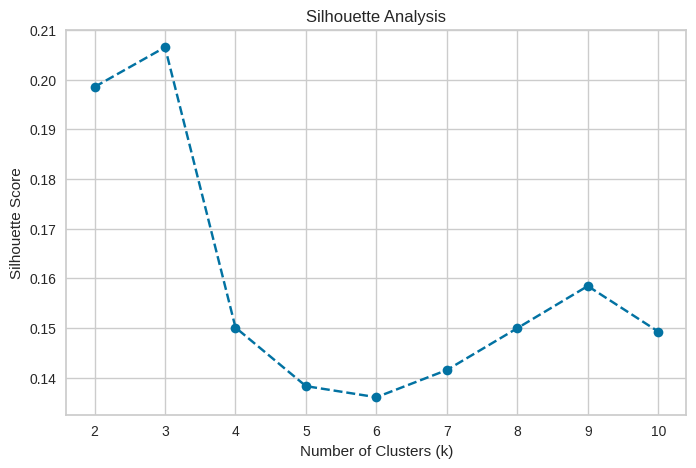

In [67]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # 2'den başlayarak minimum 2 küme olmasını sağlıyoruz
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Convert 'Age_Group' to numeric before fitting
    df_numeric = df_new.copy()

    kmeans.fit(df_numeric)  # Fit using the numeric data
    score = silhouette_score(df_numeric, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette skor grafiği
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()



---



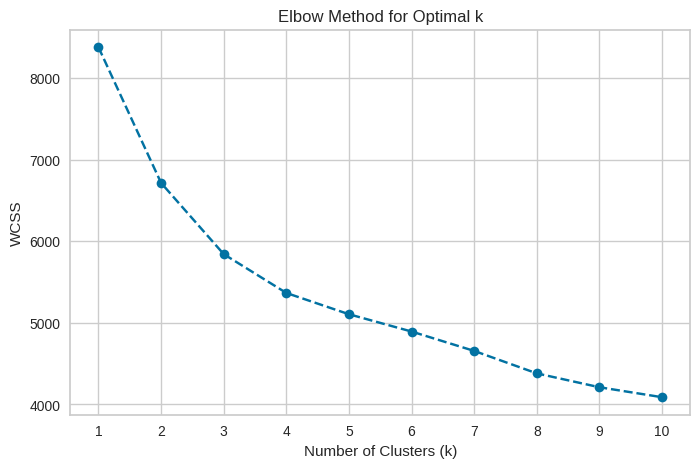

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS (Within-Cluster Sum of Squares) değerlerini hesaplama
wcss = []  # Her k için WCSS değerlerini saklamak için liste
K = range(1, 11)  # Küme sayısını 1'den 10'a kadar deneyelim

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)  # Veriyi eğitiyoruz
    wcss.append(kmeans.inertia_)  # WCSS değerini ekliyoruz

# WCSS değerlerini görselleştirme
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


Her iki yönteme göre optimum küme sayısı 3'tür.

# UMAP BOYUT AZALTMA

In [69]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


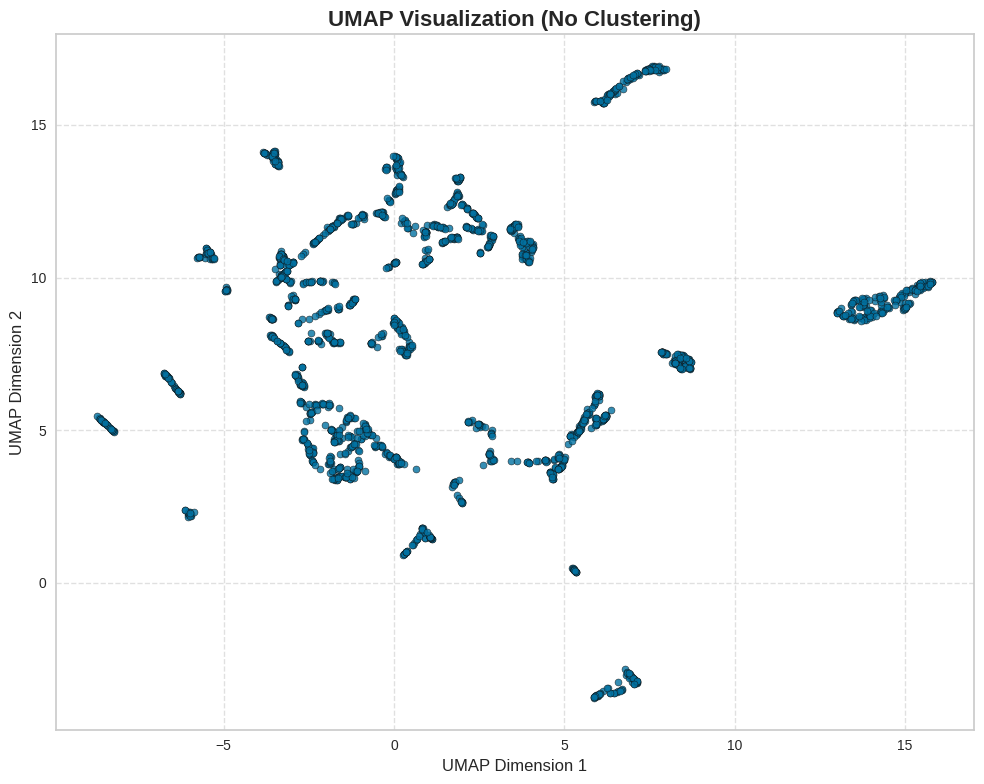

In [70]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt


umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3, random_state=42)
umap_data = umap_model.fit_transform(df_new)


# UMAP sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=umap_data[:, 0],
    y=umap_data[:, 1],
    s=25,  # Nokta boyutu
    alpha=0.8,  # Noktaların şeffaflığı
    edgecolor='k',  # Kenar rengi
    palette='viridis'
)
plt.title('UMAP Visualization (No Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

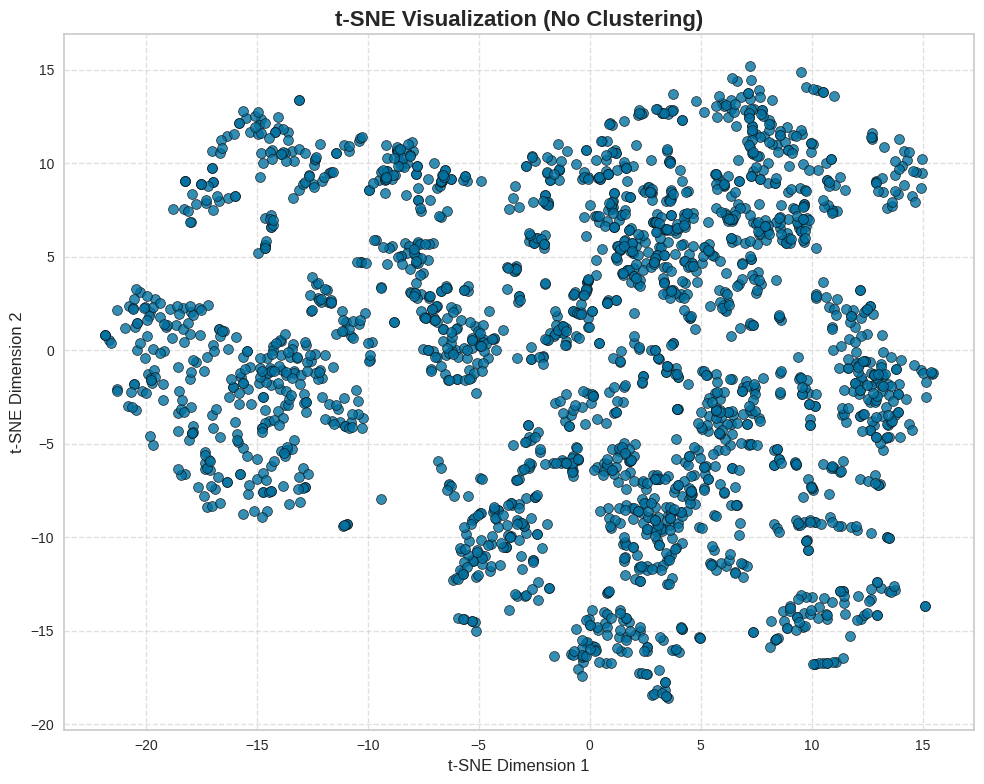

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. t-SNE ile boyut indirgeme
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
tsne_embedding = tsne.fit_transform(df_new)  # data, veri setinizdir

# 2. t-SNE sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_embedding[:, 0],
    y=tsne_embedding[:, 1],
    s=50,  # Nokta boyutu
    alpha=0.8,  # Noktaların şeffaflığı
    edgecolor='k',  # Kenar rengi
    palette='viridis'  # Renk paleti
)
plt.title('t-SNE Visualization (No Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **CLUSTERING - KÜMELEME**


K-Means: Veriyi önceden belirlenen k sayıda kümeye ayırır.

DBSCAN: Yoğunluk tabanlı kümeleme; karmaşık şekilli kümeleri bulmak için iyidir.

Hierarchical Clustering: Ağaç tabanlı bir yaklaşımla kümeler oluşturur.

***K-MEANS YÖNTEMİ İLE***




In [72]:
from sklearn.cluster import KMeans

# K-Means modeli
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)

# Modeli veriye fit etme ve küme tahminleri
y_kmeans = kmeans.fit_predict(df_new)


# Küme etiketlerini ölçeklenmiş veriye ekleme
df_new['Cluster'] = y_kmeans


In [73]:
print(df_new['Cluster'].value_counts())

Cluster
0    1225
2     766
1     249
Name: count, dtype: int64


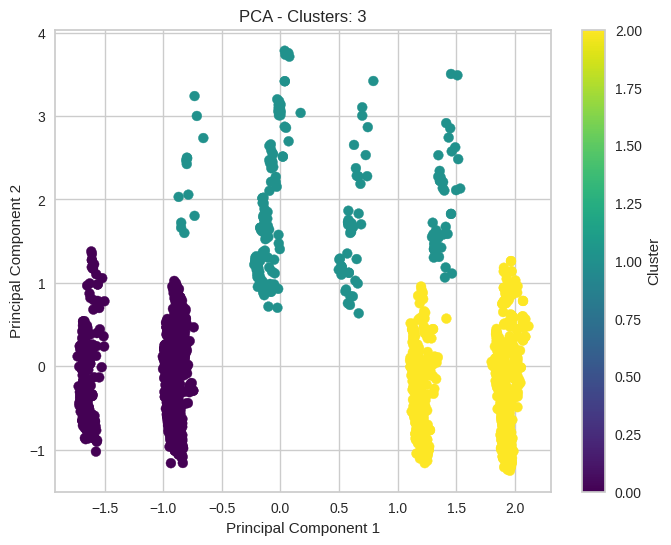

In [74]:
# PCA'yı uygulayalım ve veriyi 2 boyuta indirgemeye çalışalım
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_new)

# 3. PCA Sonuçlarının Görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA - Clusters: {3}')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [75]:
df_new.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain_standardized,Response_standardized,Dt_Customer_days,Total_Spending,AcceptedCmp_standardized,SumPurchases,ChildrenHome,Complain_encoded,Response_encoded,AcceptedCmp_encoded,Education_LabelEncoded,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO,ChildrenHome_1.0,ChildrenHome_2.0,ChildrenHome_2.5,Cluster
0,0.833320,0.885426,0.907711,1.000000,0.997135,1.000000,1.000000,0.925852,0.787949,0.0,1.0,0.952372,0.927158,0.0,0.874494,0.000000,0,1,0,1,False,False,False,True,False,False,False,False,False,False,0
1,0.779556,0.795532,0.349420,0.157293,0.307772,0.228882,0.157293,0.401374,0.678939,0.0,0.0,0.173380,0.255170,0.0,0.522295,0.876951,0,0,0,1,False,False,False,True,False,False,False,False,True,False,0
2,0.882751,0.715682,0.851687,0.887740,0.767415,0.983038,0.701438,0.775806,0.609853,0.0,0.0,0.467041,0.805655,0.0,0.829656,0.000000,0,0,0,1,False,False,False,False,True,False,False,False,False,False,0
3,0.648317,0.715682,0.349420,0.365224,0.481533,0.499570,0.314586,0.369578,0.737350,0.0,0.0,0.212574,0.363964,0.0,0.589749,0.553295,0,0,0,1,False,False,False,False,True,False,False,True,False,False,0
4,0.833951,0.988862,0.725451,0.858732,0.755884,0.802128,0.756164,0.571890,0.678939,0.0,0.0,0.245539,0.704930,0.0,0.804074,0.553295,0,0,0,3,False,False,True,False,False,False,False,True,False,False,2


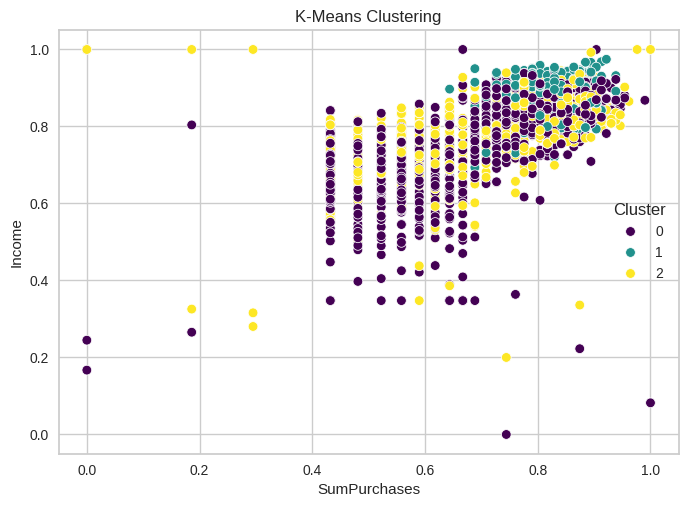

In [76]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.scatterplot(x='SumPurchases', y='Income', hue='Cluster', data=df_new, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


Cluster 0: Ort gelir seviyesi,Düşük Satın Alma

Cluster 1: Yüksek gelir seviyesi, Ortalama Satın Alma

Cluster 2: Yüksek gelir seviyesi , Yüksek Satın Alma

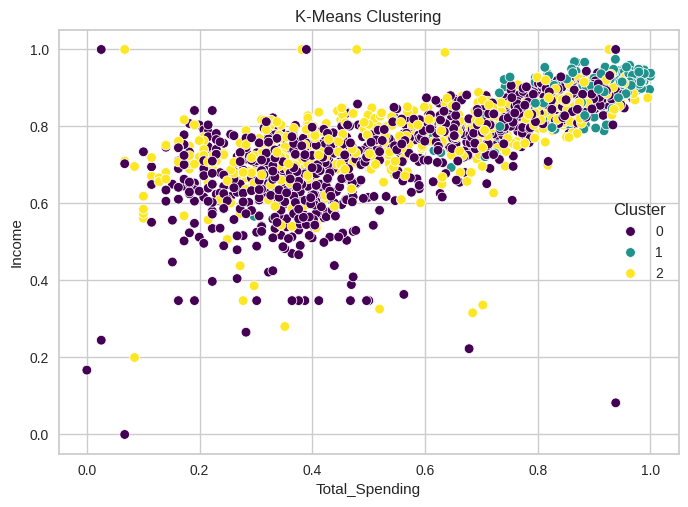

In [77]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.scatterplot(x='Total_Spending', y='Income', hue='Cluster', data=df_new, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

Cluster 0: Ort Gelir Seviyesi, Düşük Harcama

Cluster 1: Yüksek Gelir Seviyesi , Yüksek Harcama ( Başka ürünlerden satın almış olabilirler ..! )

Cluster 2: Yüksek Gelir Seviyesi , Yüksek Harcama

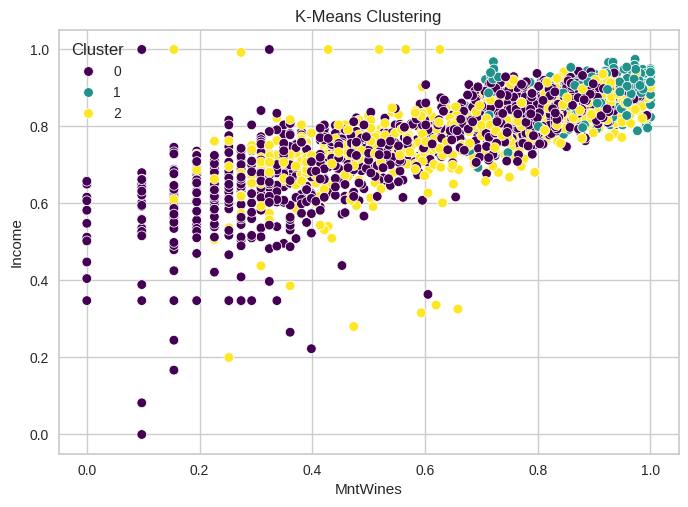

In [78]:
sns.scatterplot(x='MntWines', y='Income', hue='Cluster', data=df_new, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

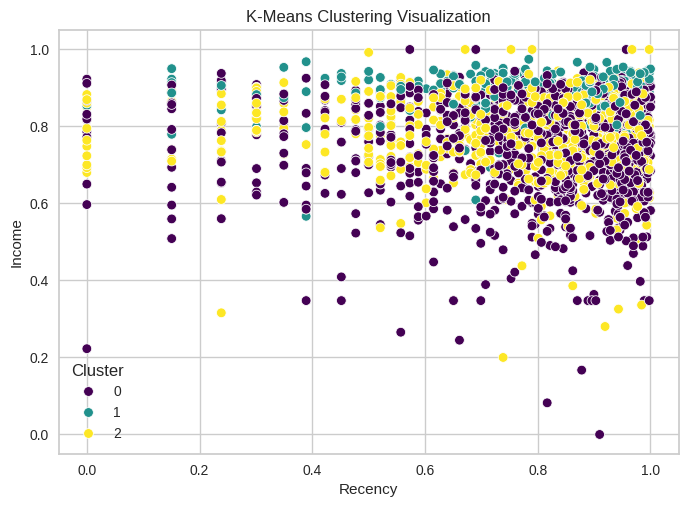

In [79]:
sns.scatterplot(x=df_new.iloc[:, 1], y=df_new.iloc[:, 0], hue=df_new['Cluster'], palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

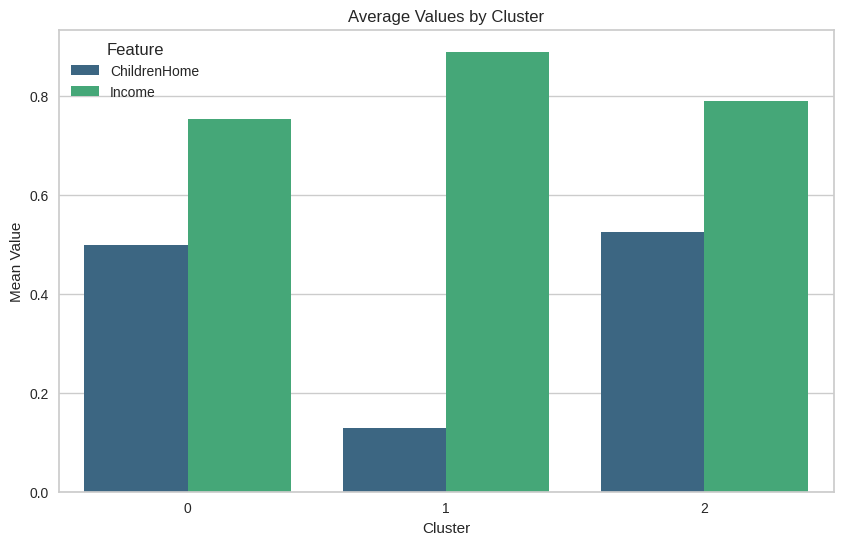

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her cluster için ortalama değerleri hesapla
cluster_means = df_new.groupby('Cluster')[['ChildrenHome', 'Income']].mean().reset_index()

# Bar grafiği çizimi
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Mean Value', hue='Feature', data=cluster_means_melted, palette='viridis')
plt.title('Average Values by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.legend(title='Feature')
plt.show()


Cluster 0: Ort gelir seviyesi, ort çocuk sayısına sahip

Cluster 1: Yüksek gelir seviyesi, ya hiç çocukları yok ya da 1 taneye sahip

Cluster 2: Yüksek gelir seviyesi, ortalamanın üzerinde çocuk sayısına sahip

# **GAUSSIAN MIXTURE YÖNTEMİ İLE KÜMELEME ANALİZİ**

In [ ]:
"""import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Örnek veri oluşturma (2 boyutlu veri oluşturuyoruz)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Küme sayısını BIC ile belirleme
bic = []
aic = []
n_components_range = range(1, 10)  # 1'den 9'a kadar küme sayısını deniyoruz

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# 4. BIC ve AIC sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Kriter Değeri')
plt.title('BIC ve AIC ile Küme Sayısı Belirleme')
plt.legend()
plt.show()

# En düşük BIC değerine sahip küme sayısını belirleme
optimal_clusters = n_components_range[np.argmin(bic)]
print(f"Optimal küme sayısı (BIC'e göre): {optimal_clusters}")


In [ ]:
"""# 5. Optimal küme sayısı ile GMM modeli oluşturma
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_scaled)

# 6. Küme Etiketlerini Tahmin Etme
labels = gmm.predict(X_scaled)

# 7. Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=40)
plt.title("Gaussian Mixture Models ile Kümeleme (Optimal Küme Sayısı)")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.colorbar(label="Küme Etiketi")
plt.show()
